Import the dependencies

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Data Collection & Analysis

In [110]:
#loading the dataset from csv file to pandas DataFrame
big_mart_data=pd.read_csv(r"C:\Users\srini\Documents\BigmartsalesPrediction\Train.csv")
test=pd.read_csv(r"C:\Users\srini\Documents\BigmartsalesPrediction\Test.csv")

In [111]:
big_mart_data.head()
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [112]:
#number of data points & number of featurs
big_mart_data.shape

(8523, 12)

In [113]:
big_mart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [114]:
#checking for missing values
big_mart_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [115]:
#mean value of "Item weight" column
big_mart_data['Item_Weight'].mean()
test['Item_Weight'].mean()

12.695633368756374

In [116]:
#filling the missing values in Item_weight column with mean value
big_mart_data['Item_Weight'].fillna(big_mart_data['Item_Weight'].mean(), inplace = True)
test['Item_Weight'].fillna(big_mart_data['Item_Weight'].mean(), inplace = True)

In [117]:
big_mart_data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [118]:
mode_of_outlet_size = big_mart_data.pivot_table(values='Outlet_Size', columns = 'Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
mod = test.pivot_table(values='Outlet_Size', columns = 'Outlet_Type', aggfunc=(lambda x: x.mode()[0]))

In [119]:
print(mode_of_outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [120]:
missing_values=big_mart_data['Outlet_Size'].isnull()
mv=test['Outlet_Size'].isnull()

In [121]:
print(missing_values)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [122]:
big_mart_data.loc[missing_values,'Outlet_Size'] = big_mart_data.loc[missing_values, 'Outlet_Type'].apply(lambda x: mode_of_outlet_size[x])
test.loc[mv,'Outlet_Size'] = test.loc[mv, 'Outlet_Type'].apply(lambda x: mod[x])

In [123]:
big_mart_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [124]:
test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [125]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [126]:
big_mart_data.replace({'Item_Visibility': {0.000000:0.066132}}, inplace=True)


In [127]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Data Analysis

In [128]:
big_mart_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.070213,140.992782,1997.831867,2181.288914
std,4.226124,0.048742,62.275067,8.371760,1706.499616
min,4.555000,0.003575,31.290000,1985.000000,33.290000
25%,9.310000,0.033085,93.826500,1987.000000,834.247400
50%,12.857645,0.062517,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [129]:
fv=big_mart_data.loc[big_mart_data["Item_Type"].str.startswith("Fruits and Vegetables")]
fv

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200000,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
10,FDY07,11.800000,Low Fat,0.066132,Fruits and Vegetables,45.5402,OUT049,1999,Medium,Tier 1,Supermarket Type1,1516.0266
12,FDX32,15.100000,Regular,0.100014,Fruits and Vegetables,145.4786,OUT049,1999,Medium,Tier 1,Supermarket Type1,1589.2646
14,FDF32,16.350000,Low Fat,0.068024,Fruits and Vegetables,196.4426,OUT013,1987,High,Tier 3,Supermarket Type1,1977.4260
36,FDV20,12.857645,Regular,0.059512,Fruits and Vegetables,128.0678,OUT027,1985,Medium,Tier 3,Supermarket Type3,2797.6916
...,...,...,...,...,...,...,...,...,...,...,...,...
8490,FDU44,12.857645,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656
8497,FDT08,13.650000,Low Fat,0.049209,Fruits and Vegetables,150.0050,OUT035,2004,Small,Tier 2,Supermarket Type1,2247.0750
8503,FDQ44,20.500000,Low Fat,0.036133,Fruits and Vegetables,120.1756,OUT035,2004,Small,Tier 2,Supermarket Type1,3392.9168
8508,FDW31,11.350000,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,Small,Tier 2,Supermarket Type1,2587.9646


In [130]:
sns.set()

C:\Downloads\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


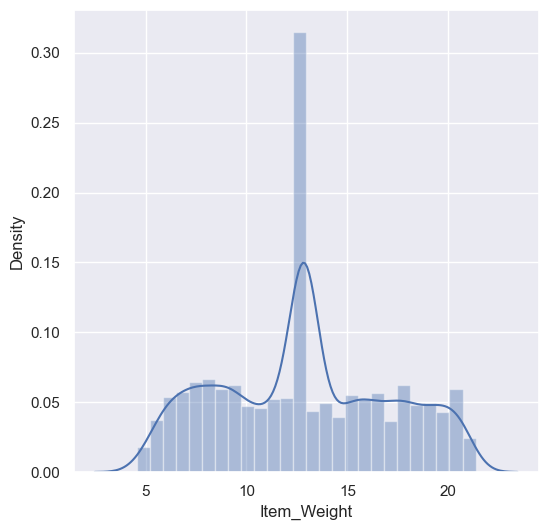

In [131]:
#Item_Weight distribution
plt.figure(figsize=(6,6))
sns.distplot(big_mart_data['Item_Weight'])
plt.show()

C:\Downloads\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


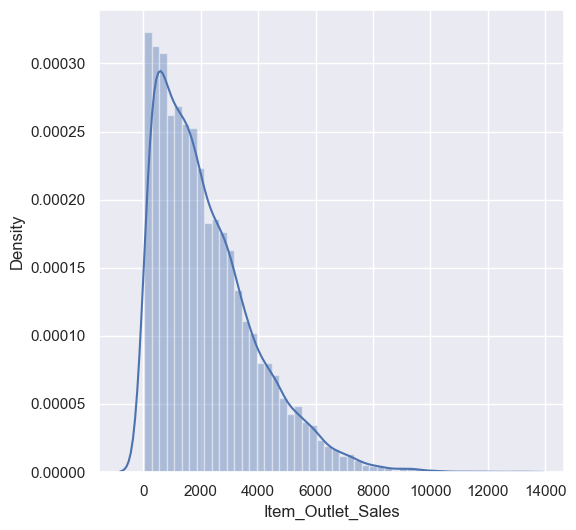

In [132]:
#Item_Outlet_Sales distribution
plt.figure(figsize=(6,6))
sns.distplot(big_mart_data['Item_Outlet_Sales'])
plt.show()

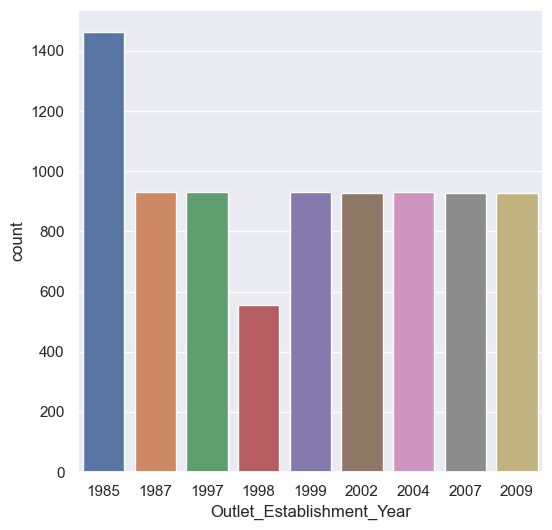

In [133]:
#Outlet_Establishment_Year column
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year', data=big_mart_data)
plt.show()

categorical Features

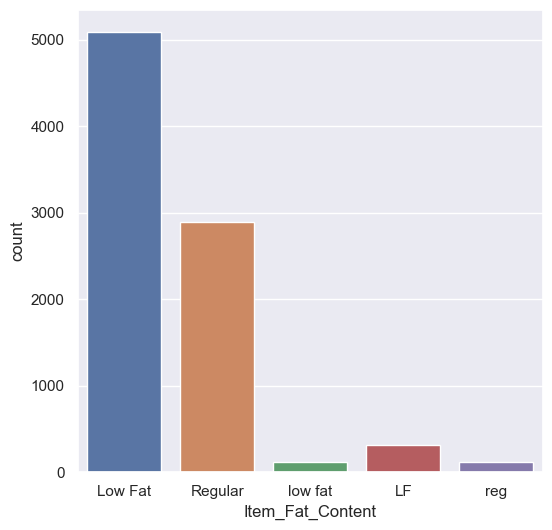

In [134]:
#Item_Fat_Content column
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content', data=big_mart_data)
plt.show()

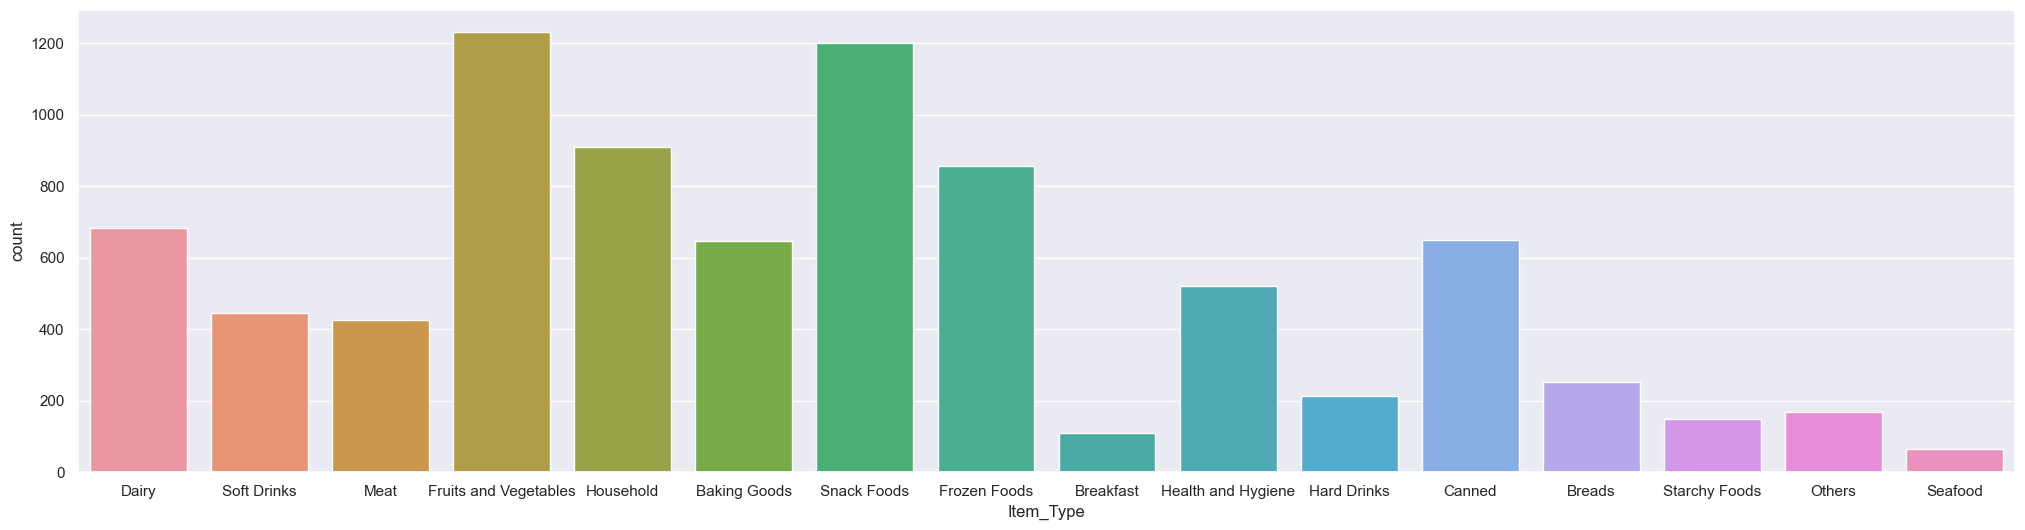

In [135]:
#Item_Type column
plt.figure(figsize=(25,6))
sns.countplot(x='Item_Type', data=big_mart_data)
plt.show()

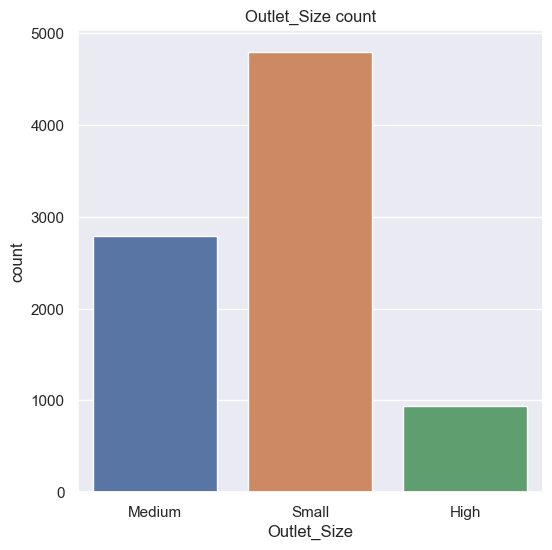

In [136]:

plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Size', data=big_mart_data)
plt.title('Outlet_Size count')
plt.show()

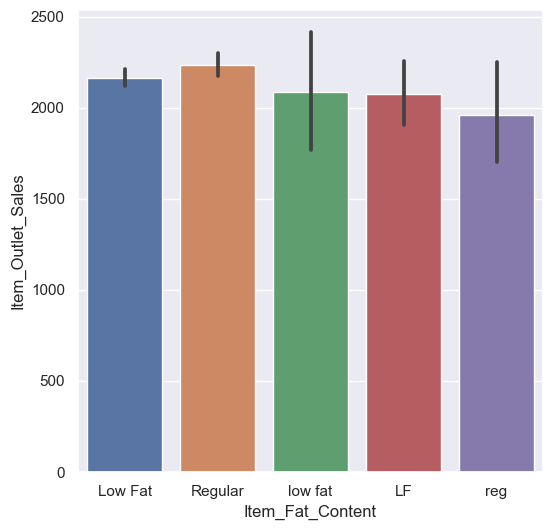

In [137]:
plt.figure(figsize=(6,6))
sns.barplot(x='Item_Fat_Content',y='Item_Outlet_Sales', data=big_mart_data)
plt.show()

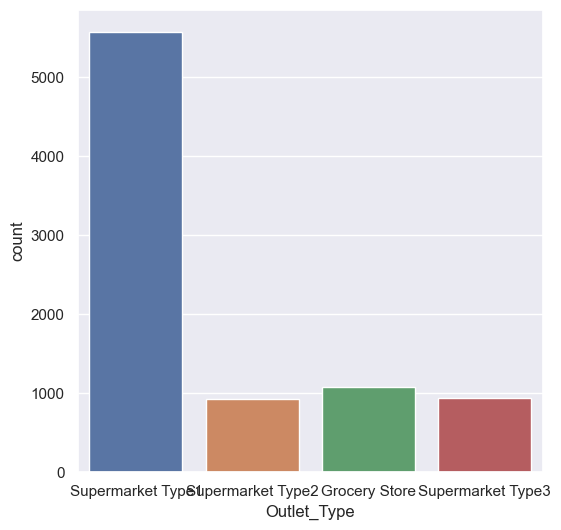

In [138]:
#Outlet_Type column
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Type', data=big_mart_data)
plt.show()

Data Preprocessing

In [139]:
#import pandas_profiling

In [140]:
#from pandas_profiling import ProfileReport
#profile=ProfileReport(big_mart_data)

In [141]:
#profile

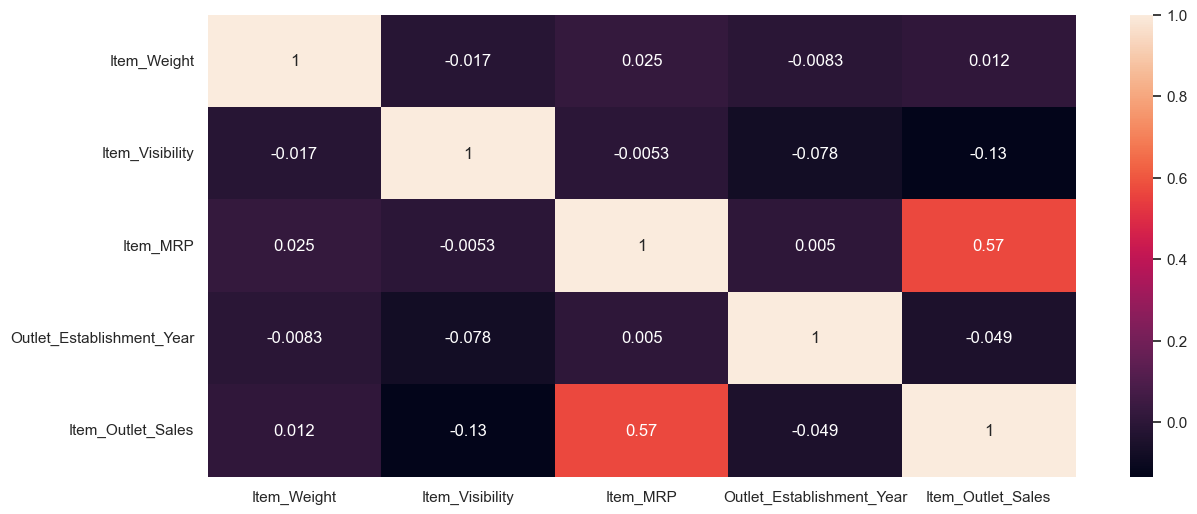

In [142]:
plt.figure(figsize=(14,6))
sns.heatmap(big_mart_data.corr(),annot=True)
plt.show()

In [143]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [144]:
big_mart_data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [145]:
big_mart_data.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}}, inplace=True)

In [146]:
big_mart_data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [147]:
big_mart_data['Outlet_Establishment_Year']=2013-big_mart_data['Outlet_Establishment_Year']

Target Encoding

In [148]:
# from sklearn.preprocessing import LabelEncoder
# encoder = LabelEncoder()

In [149]:
import category_encoders as ce
cat_cols = ['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type']
encoder = ce.TargetEncoder(cols=cat_cols)

big_mart_data_ = encoder.fit_transform(big_mart_data[cat_cols], big_mart_data['Item_Outlet_Sales'])
big_mart_data_.columns = [col+'_enc' for col in big_mart_data_.columns]
big_mart_data = pd.concat([big_mart_data,big_mart_data_], axis=1)
big_mart_data


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Identifier_enc,Item_Fat_Content_enc,Item_Type_enc,Outlet_Identifier_enc,Outlet_Size_enc,Outlet_Location_Type_enc,Outlet_Type_enc
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,14,Medium,Tier 1,Supermarket Type1,3735.1380,2879.598286,2157.711534,2232.542597,2348.354635,2681.603542,1876.909159,2316.181148
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,4,Medium,Tier 3,Supermarket Type2,443.4228,1920.354050,2224.561170,2006.511735,1995.498739,2681.603542,2279.627651,1995.498739
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,14,Medium,Tier 1,Supermarket Type1,2097.2700,2030.685308,2157.711534,2158.977911,2348.354635,2681.603542,1876.909159,2316.181148
3,FDX07,19.200,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,15,Small,Tier 3,Grocery Store,732.3800,2347.410648,2224.561170,2289.009592,339.351662,1867.182814,2279.627651,339.828500
4,NCD19,8.930,Low Fat,0.066132,Household,53.8614,OUT013,26,High,Tier 3,Supermarket Type1,994.7052,1879.152033,2157.711534,2258.784300,2298.995256,2298.995256,2279.627651,2316.181148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,26,High,Tier 3,Supermarket Type1,2778.3834,2424.628001,2157.711534,2277.321739,2298.995256,2298.995256,2279.627651,2316.181148
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,11,Small,Tier 2,Supermarket Type1,549.2850,2271.350452,2224.561170,1952.971207,2192.384798,1867.182814,2323.990559,2316.181148
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,9,Small,Tier 2,Supermarket Type1,1193.1136,1991.431370,2157.711534,2010.000265,2438.841866,1867.182814,2323.990559,2316.181148
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,4,Medium,Tier 3,Supermarket Type2,1845.5976,2158.829654,2224.561170,2277.321739,1995.498739,2681.603542,2279.627651,1995.498739


In [150]:
# big_mart_data['Item_Identifier'] = encoder.fit_transform(big_mart_data['Item_Identifier'])
# big_mart_data['Item_Fat_Content'] = encoder.fit_transform(big_mart_data['Item_Fat_Content'])
# big_mart_data['Item_Type'] = encoder.fit_transform(big_mart_data['Item_Type'])
# big_mart_data['Outlet_Identifier'] = encoder.fit_transform(big_mart_data['Outlet_Identifier'])
# big_mart_data['Outlet_Size'] = encoder.fit_transform(big_mart_data['Outlet_Size'])
# big_mart_data['Outlet_Location_Type'] = encoder.fit_transform(big_mart_data['Outlet_Location_Type'])
# big_mart_data['Outlet_Type'] = encoder.fit_transform(big_mart_data['Outlet_Type'])

In [151]:
big_mart_data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Item_Identifier_enc',
       'Item_Fat_Content_enc', 'Item_Type_enc', 'Outlet_Identifier_enc',
       'Outlet_Size_enc', 'Outlet_Location_Type_enc', 'Outlet_Type_enc'],
      dtype='object')

In [152]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Identifier_enc,Item_Fat_Content_enc,Item_Type_enc,Outlet_Identifier_enc,Outlet_Size_enc,Outlet_Location_Type_enc,Outlet_Type_enc
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,14,Medium,Tier 1,Supermarket Type1,3735.1380,2879.598286,2157.711534,2232.542597,2348.354635,2681.603542,1876.909159,2316.181148
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,4,Medium,Tier 3,Supermarket Type2,443.4228,1920.354050,2224.561170,2006.511735,1995.498739,2681.603542,2279.627651,1995.498739
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,14,Medium,Tier 1,Supermarket Type1,2097.2700,2030.685308,2157.711534,2158.977911,2348.354635,2681.603542,1876.909159,2316.181148
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,15,Small,Tier 3,Grocery Store,732.3800,2347.410648,2224.561170,2289.009592,339.351662,1867.182814,2279.627651,339.828500
4,NCD19,8.93,Low Fat,0.066132,Household,53.8614,OUT013,26,High,Tier 3,Supermarket Type1,994.7052,1879.152033,2157.711534,2258.784300,2298.995256,2298.995256,2279.627651,2316.181148


Splitting features and Target

In [153]:
X = big_mart_data.drop(columns='Item_Outlet_Sales', axis=1)
Y = big_mart_data[['Item_Outlet_Sales']]#.drop(columns=['Item_Identifier','Item_Weight','Item_Identifier','Item_Fat_Content','Item_Visibility','Item_Type','Item_MRP','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type'], axis="columns")

In [154]:
print(X)

     Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.066132   
4              NCD19        8.930          Low Fat         0.066132   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   
1               Soft Drinks  

In [155]:
print(Y)

      Item_Outlet_Sales
0             3735.1380
1              443.4228
2             2097.2700
3              732.3800
4              994.7052
...                 ...
8518          2778.3834
8519           549.2850
8520          1193.1136
8521          1845.5976
8522           765.6700

[8523 rows x 1 columns]


In [156]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X,Y,test_size=0.3,random_state=101)

In [157]:
print(X.shape, X_train.shape, X_test.shape,Y_train.shape,Y.shape)

(8523, 18) (5966, 18) (2557, 18) (5966, 1) (8523, 1)


In [158]:
model_cols = set(X.columns)-set(cat_cols)
model_cols

{'Item_Fat_Content_enc',
 'Item_Identifier_enc',
 'Item_MRP',
 'Item_Type_enc',
 'Item_Visibility',
 'Item_Weight',
 'Outlet_Establishment_Year',
 'Outlet_Identifier_enc',
 'Outlet_Location_Type_enc',
 'Outlet_Size_enc',
 'Outlet_Type_enc'}

Linear Regression

In [159]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [160]:
lr.fit(X_train[model_cols],Y_train)

C:\Users\srini\AppData\Local\Temp\ipykernel_15156\1510029617.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  lr.fit(X_train[model_cols],Y_train)


LinearRegression()

In [161]:
X_test.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Identifier_enc,Item_Fat_Content_enc,Item_Type_enc,Outlet_Identifier_enc,Outlet_Size_enc,Outlet_Location_Type_enc,Outlet_Type_enc
8179,NCN17,11.00,Low Fat,0.055163,Health and Hygiene,100.3358,OUT018,4,Medium,Tier 3,Supermarket Type2,2030.196596,2157.711534,2010.000265,1995.498739,2681.603542,2279.627651,1995.498739
8355,FDW45,18.00,Low Fat,0.038979,Snack Foods,148.6418,OUT013,26,High,Tier 3,Supermarket Type1,2283.423499,2157.711534,2277.321739,2298.995256,2298.995256,2279.627651,2316.181148
3411,FDT23,7.72,Regular,0.074731,Breads,77.5986,OUT046,16,Small,Tier 1,Supermarket Type1,1999.368673,2224.561170,2204.132226,2277.844267,1867.182814,1876.909159,2316.181148
7089,FDE32,20.70,Low Fat,0.049035,Fruits and Vegetables,39.9506,OUT017,6,Small,Tier 2,Supermarket Type1,1859.901011,2157.711534,2289.009592,2340.675263,1867.182814,2323.990559,2316.181148
6954,FDF14,7.55,Low Fat,0.027225,Canned,152.9340,OUT045,11,Small,Tier 2,Supermarket Type1,2220.020701,2157.711534,2225.194904,2192.384798,1867.182814,2323.990559,2316.181148


In [162]:
Y_pred=lr.predict(X_test[model_cols])

C:\Users\srini\AppData\Local\Temp\ipykernel_15156\566900500.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  Y_pred=lr.predict(X_test[model_cols])


In [163]:
print(Y_pred)

[[1250.11370271]
 [2781.91378519]
 [1317.68852046]
 ...
 [1344.71672095]
 [3137.75092483]
 [3636.35501442]]


In [164]:
print(Y_test)

      Item_Outlet_Sales
8179           904.8222
8355          2795.6942
3411          1947.4650
7089           872.8638
6954          2450.1440
...                 ...
2135           366.1900
3122          3361.6242
5822          1860.2452
6402          2766.3990
2881          4506.1344

[2557 rows x 1 columns]


<AxesSubplot: xlabel='Item_Outlet_Sales'>

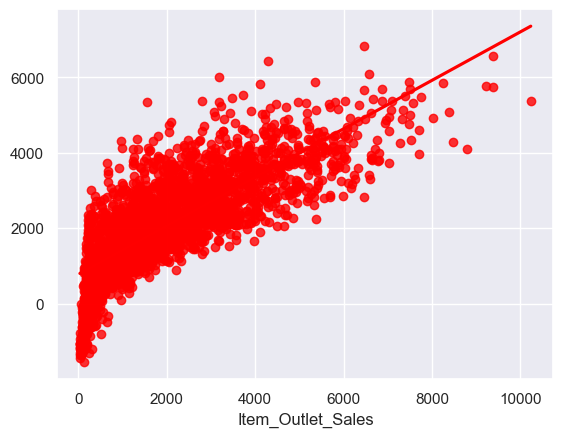

In [165]:
sns.regplot(x=Y_test,y=Y_pred,ci=None,color='red')

In [166]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [167]:
print("r2 score :")
print(r2_score(Y_test,Y_pred))
print("mean absolute error :")
print(mean_absolute_error(Y_test,Y_pred))
print("mean square error :")
#print(np.sqrt(mean_squared_error(Y_test,Y_pred)))
print(mean_squared_error(Y_test,Y_pred))

r2 score :
0.6143314524284305
mean absolute error :
768.6081529221325
mean square error :
1036142.4460105444


In [168]:
import shap
shap.initjs()
explainer = shap.Explainer(lr,X_train[model_cols])
shap_values = explainer(X_test[model_cols])
shap.summary_plot(shap_values, X_test[model_cols], plot_type="bar")
# shap.summary_plot(shap_values,feature_names=X_test.columns)

ImportError: Numba needs NumPy 1.21 or less

In [ ]:
X_test['pred'] = Y_pred
X_test['actual'] =Y_test

In [ ]:
column = 'Outlet_Type'
k = X_test.groupby([column])[['actual','pred']].sum().reset_index()
k = pd.melt(k, id_vars=column, var_name="type_of_value", value_name="sales")
# plt.figure(figsize=(20,20))
sns.factorplot(x=column, y='sales', hue='type_of_value', data=k, kind='bar', height=5, aspect=11.7/8.27)

RandomForest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf= RandomForestRegressor(n_estimators=200,max_depth=5,n_jobs=4,random_state=10,min_samples_leaf=100)

In [ ]:
rf.fit(X_train[model_cols],Y_train)
Y_pred_rf= rf.predict(X_test[model_cols])

In [ ]:
print("r2 score :")
print(r2_score(Y_test,Y_pred_rf))
print("mean absolute error :")
print(mean_absolute_error(Y_test,Y_pred_rf))
print("mean square error :")
#print(np.sqrt(mean_squared_error(Y_test,Y_pred_rf)))
print(mean_squared_error(Y_test,Y_pred_rf))

In [ ]:
rf= RandomForestRegressor(n_estimators=400,max_depth=5,n_jobs=4,random_state=101,min_samples_leaf=100)
rf.fit(X_train[model_cols],Y_train)
Y_pred_rf= rf.predict(X_test[model_cols])
print("r2 score :")
print(r2_score(Y_test,Y_pred_rf))
print("mean absolute error :")
print(mean_absolute_error(Y_test,Y_pred_rf))
print("mean square error :")
print(mean_squared_error(Y_test,Y_pred_rf))

In [ ]:
rf= RandomForestRegressor(n_estimators=600,max_depth=5,n_jobs=4,random_state=10,min_samples_leaf=100)
rf.fit(X_train[model_cols],Y_train)
Y_pred_rf= rf.predict(X_test[model_cols])
print("r2 score :")
print(r2_score(Y_test,Y_pred_rf))
print("mean absolute error :")
print(mean_absolute_error(Y_test,Y_pred_rf))
print("mean square error :")
print(mean_squared_error(Y_test,Y_pred_rf))

Using Grid Search_CV Parameters

In [ ]:
rf= RandomForestRegressor(n_estimators=400,max_depth=7,n_jobs=4,min_samples_leaf=10,max_features=5,learning_rate= 0.1)
rf.fit(X_train[model_cols],Y_train)
Y_pred_rf= rf.predict(X_test[model_cols])
print("r2 score :")
print(r2_score(Y_test,Y_pred_rf))
print("mean absolute error :")
print(mean_absolute_error(Y_test,Y_pred_rf))
print("mean square error :")
print(mean_squared_error(Y_test,Y_pred_rf))

In [ ]:
#import pickle

# Train and evaluate your model here

# Save the model to disk using pickle
#with open('rfg.pkl', 'wb') as file:
    #pickle.dump(rf, file)
#with open('model.pkl', 'rb') as file:
    #saved_model = pickle.load(file)

In [ ]:
# columns = ['Item_Identifier','Item_MRP','Outlet_Type','Outlet_Establishment_Year','Outlet_Size','Outlet_Identifier']

#X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.3, random_state=101)

In [ ]:
#from sklearn.model_selection import GridSearchCV

#param_grid = {
   #'bootstrap': [True],
   # 'max_depth': [5, 7, 9, 11],
   #'max_features': [5, 7, 9, 3, 11],
   #'min_samples_leaf': [10, 50, 100],
    #'n_estimators': [200, 400, 600, 300]
#}

#rf = RandomForestRegressor()
#grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 5, n_jobs = 4, verbose = 2)
#grid_search.fit(X_train[model_cols],Y_train)
#grid_search.best_params_

In [ ]:
#Y_pred_rf= grid_search.predict(X_test[model_cols])
#print(r2_score(Y_test,Y_pred_rf))
#print(mean_absolute_error(Y_test,Y_pred_rf))
#print(np.sqrt(mean_squared_error(Y_test,Y_pred_rf)))

In [ ]:
import shap
shap.initjs()
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test[model_cols])
shap.summary_plot(shap_values, X_test[model_cols], plot_type="bar")

In [ ]:
i = 8
shap.force_plot(explainer.expected_value, shap_values[i],feature_names=model_cols,features=X_test[model_cols].iloc[i])

In [ ]:
X_test['pred'] = Y_pred_rf
X_test['actual'] =Y_test
X_test

In [169]:
column = 'Outlet_Type'
k = X_test.groupby([column])[['actual','pred']].sum().reset_index()
k = pd.melt(k, id_vars=column, var_name="type_of_value", value_name="sales")
# plt.figure(figsize=(20,20))
sns.factorplot(x=column, y='sales', hue='type_of_value', data=k, kind='bar', height=8.27, aspect=11.7/8.27)


KeyError: "Columns not found: 'actual', 'pred'"

In [170]:
X_train, X_test, Y_train, Y_test= train_test_split(X,Y,test_size=0.3,random_state=101)

In [171]:
from sklearn.linear_model import Lasso

In [172]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train[model_cols], Y_train)
Y_pred = lasso.predict(X_test[model_cols])
print("r2 score :")
print(r2_score(Y_test,Y_pred))
print("mean absolute error :")
print(mean_absolute_error(Y_test,Y_pred))
print("mean square error :")
#print(np.sqrt(mean_squared_error(Y_test,Y_pred)))
print(mean_squared_error(Y_test,Y_pred))

r2 score :
0.6143736478688395
mean absolute error :
768.5691423143774
mean square error :
1036029.0831576202


C:\Users\srini\AppData\Local\Temp\ipykernel_15156\1668741102.py:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  lasso.fit(X_train[model_cols], Y_train)
C:\Downloads\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.335e+09, tolerance: 1.792e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\srini\AppData\Local\Temp\ipykernel_15156\1668741102.py:3: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  Y_pred = lasso.predict(X_test[model_cols])


In [173]:
from sklearn.model_selection import GridSearchCV

In [174]:
param_grid = {'alpha': [0.001, 0.01, 0.1, 1]}
grid_search = GridSearchCV(lasso, param_grid=param_grid, cv=5)

In [175]:
grid_search.fit(X_train[model_cols], Y_train)
print("Best Parameter: ", grid_search.best_params_)

C:\Users\srini\AppData\Local\Temp\ipykernel_15156\2452251168.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  grid_search.fit(X_train[model_cols], Y_train)
C:\Downloads\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.684e+09, tolerance: 1.439e+06
  model = cd_fast.enet_coordinate_descent(
C:\Downloads\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.678e+09, tolerance: 1.436e+06
  model = cd_fast.enet_coordinate_descent(
C:\Downloads\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinat

Best Parameter:  {'alpha': 1}


C:\Downloads\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.131e+09, tolerance: 1.792e+06
  model = cd_fast.enet_coordinate_descent(


In [176]:
lasso = Lasso(alpha=1)
lasso.fit(X_train[model_cols], Y_train)
Y_pred = lasso.predict(X_test[model_cols])
print("r2 score :")
print(r2_score(Y_test,Y_pred))
print("mean absolute error :")
print(mean_absolute_error(Y_test,Y_pred))
print("mean square error :")
print(mean_squared_error(Y_test,Y_pred))

r2 score :
0.6144439360878899
mean absolute error :
768.5464107680348
mean square error :
1035840.2458576348


C:\Users\srini\AppData\Local\Temp\ipykernel_15156\34570289.py:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  lasso.fit(X_train[model_cols], Y_train)
C:\Downloads\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.131e+09, tolerance: 1.792e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\srini\AppData\Local\Temp\ipykernel_15156\34570289.py:3: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  Y_pred = lasso.predict(X_test[model_cols])


Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.


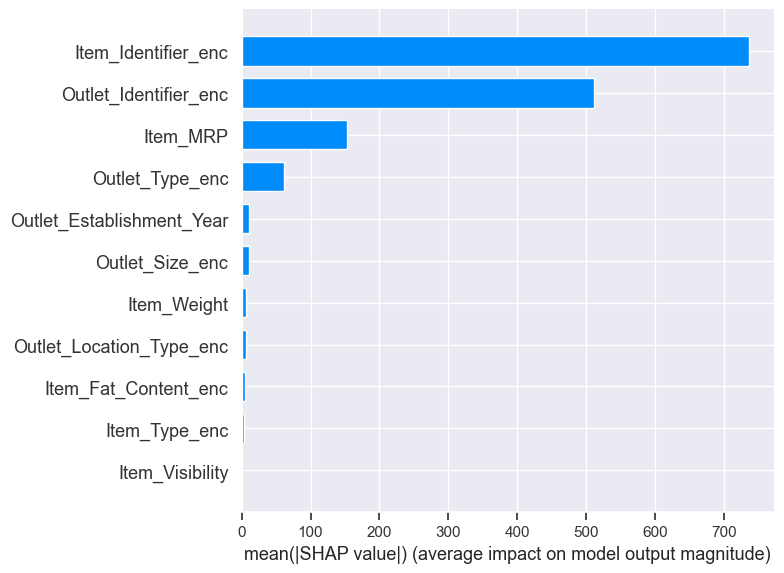

In [86]:
explainer = shap.Explainer(lasso, X_train[model_cols])
shap_values = explainer(X_test[model_cols])
shap.summary_plot(shap_values, X_test[model_cols], plot_type="bar")

In [87]:
X_test['pred'] = Y_pred
X_test['actual'] =Y_test

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.


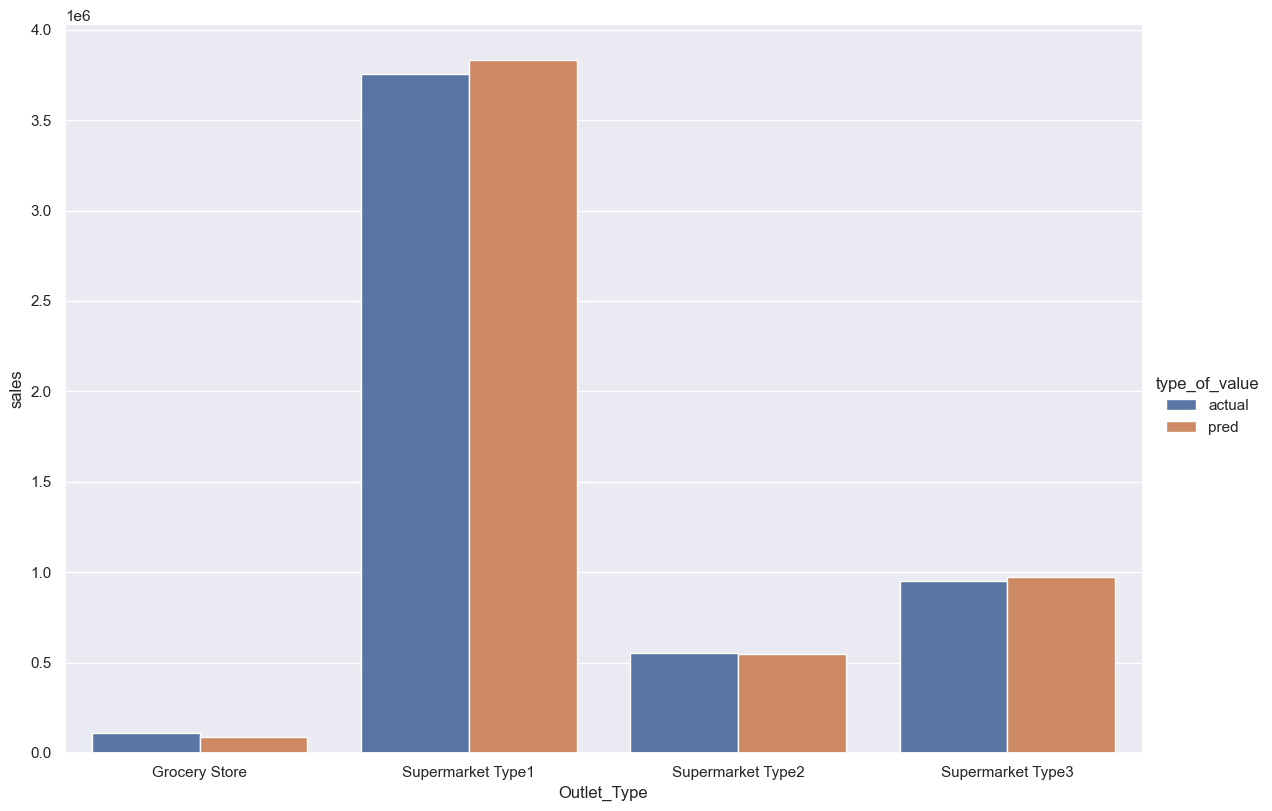

In [88]:
column = 'Outlet_Type'
k = X_test.groupby([column])[['actual','pred']].sum().reset_index()
k = pd.melt(k, id_vars=column, var_name="type_of_value", value_name="sales")
# plt.figure(figsize=(20,20))
sns.factorplot(x=column, y='sales', hue='type_of_value', data=k, kind='bar', height=8.27, aspect=11.7/8.27)

In [93]:
X_test.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Identifier_enc,Item_Fat_Content_enc,Item_Type_enc,Outlet_Identifier_enc,Outlet_Size_enc,Outlet_Location_Type_enc,Outlet_Type_enc,pred,actual
8179,NCN17,11.000000,Low Fat,0.055163,Health and Hygiene,100.3358,OUT018,4,Medium,Tier 3,Supermarket Type2,2030.196596,2157.711534,2010.000265,1995.498739,2681.603542,2279.627651,1995.498739,1251.565892,904.8222
8355,FDW45,18.000000,Low Fat,0.038979,Snack Foods,148.6418,OUT013,26,High,Tier 3,Supermarket Type1,2283.423499,2157.711534,2277.321739,2298.995256,2298.995256,2279.627651,2316.181148,2771.644035,2795.6942
3411,FDT23,7.720000,Regular,0.074731,Breads,77.5986,OUT046,16,Small,Tier 1,Supermarket Type1,1999.368673,2224.561170,2204.132226,2277.844267,1867.182814,1876.909159,2316.181148,1322.402723,1947.4650
7089,FDE32,20.700000,Low Fat,0.049035,Fruits and Vegetables,39.9506,OUT017,6,Small,Tier 2,Supermarket Type1,1859.901011,2157.711534,2289.009592,2340.675263,1867.182814,2323.990559,2316.181148,734.499011,872.8638
6954,FDF14,7.550000,Low Fat,0.027225,Canned,152.9340,OUT045,11,Small,Tier 2,Supermarket Type1,2220.020701,2157.711534,2225.194904,2192.384798,1867.182814,2323.990559,2316.181148,2380.485525,2450.1440
6986,FDJ45,12.857645,Low Fat,0.128533,Seafood,34.2216,OUT019,28,Small,Tier 1,Grocery Store,1857.131608,2157.711534,2324.310010,340.329723,1867.182814,1876.909159,339.828500,-1169.802705,173.1080
2512,FDT22,10.395000,Low Fat,0.112554,Snack Foods,59.0220,OUT018,4,Medium,Tier 3,Supermarket Type2,1971.384539,2157.711534,2277.321739,1995.498739,2681.603542,2279.627651,1995.498739,875.499079,1378.2060
6395,FDE17,20.100000,Regular,0.054455,Frozen Foods,149.5366,OUT046,16,Small,Tier 1,Supermarket Type1,2241.271946,2224.561170,2132.867744,2277.844267,1867.182814,1876.909159,2316.181148,2558.346525,2871.5954
8094,FDX01,10.100000,Low Fat,0.040446,Canned,118.1150,OUT010,15,Small,Tier 3,Grocery Store,2030.218777,2157.711534,2225.194904,339.351662,1867.182814,2279.627651,339.828500,-218.698682,116.5150
1004,DRG03,14.500000,Low Fat,0.061935,Dairy,154.4998,OUT013,26,High,Tier 3,Supermarket Type1,2288.392304,2157.711534,2232.542597,2298.995256,2298.995256,2279.627651,2316.181148,2804.730037,1691.7978


In [92]:
Y_test

,Item_Outlet_Sales
8179,904.8222
8355,2795.6942
3411,1947.4650
7089,872.8638
6954,2450.1440
...,...
2135,366.1900
3122,3361.6242
5822,1860.2452
6402,2766.3990


In [89]:
test.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300000,reg,0.038428,Dairy,87.3198,OUT017,2007,Small,Tier 2,Supermarket Type1
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,Small,Tier 3,Grocery Store
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Small,Tier 2,Supermarket Type1
4,FDY38,12.857645,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
5,FDH56,9.800000,Regular,0.063817,Fruits and Vegetables,117.1492,OUT046,1997,Small,Tier 1,Supermarket Type1
6,FDL48,19.350000,Regular,0.082602,Baking Goods,50.1034,OUT018,2009,Medium,Tier 3,Supermarket Type2
7,FDC48,12.857645,Low Fat,0.015782,Baking Goods,81.0592,OUT027,1985,Medium,Tier 3,Supermarket Type3
8,FDN33,6.305000,Regular,0.123365,Snack Foods,95.7436,OUT045,2002,Small,Tier 2,Supermarket Type1
9,FDA36,5.985000,Low Fat,0.005698,Baking Goods,186.8924,OUT017,2007,Small,Tier 2,Supermarket Type1
